# RNN

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

# Better data creation

In [3]:
sample = "if you want you"

idx2char = list(set(sample))
char2idx = {c: i for i, c in enumerate(idx2char)}

#hyper parameter
dic_size = len(char2idx)            # RNN input size(one hot size)
rnn_hidden_size = len(char2idx)     # RNN output size
num_classes = len(char2idx)         # final output size( RNN or softmax, etc)
batch_size = 1                      # one sample data, one batch
sequence_length = len(sample) - 1   # number of LSTM unfolding (unit #)


sample_idx =[char2idx[c] for c in sample]
x_data = [sample_idx[:-1]]
y_data = [sample_idx[1:]]
# x, y: size 1 * 14 
X = tf.placeholder(tf.int32, [None, sequence_length])
Y = tf.placeholder(tf.int32, [None, sequence_length])
# X_one hot size : 1 * 14 * 10
X_one_hot = tf.one_hot(X, num_classes)
weights = tf.ones([batch_size, sequence_length])
cell = tf.contrib.rnn.BasicLSTMCell(num_units=rnn_hidden_size, state_is_tuple=True)
initial_state = cell.zero_state(batch_size, tf.float32)
outputs, _states = tf.nn.dynamic_rnn(cell, X_one_hot, initial_state = initial_state, dtype = tf.float32)
sequence_loss = tf.contrib.seq2seq.sequence_loss(logits=outputs, targets=Y, weights=weights)

loss = tf.reduce_mean(sequence_loss)
train = tf.train.AdamOptimizer(learning_rate = 0.1).minimize(loss)

prediction = tf.argmax(outputs, axis = 2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(3000):
        l,_ = sess.run([loss, train], feed_dict = {X:x_data, Y:y_data})
        result = sess.run(prediction, feed_dict = {X: x_data})
        
        result_str = [idx2char[c] for c in np.squeeze(result)]
        if i % 200 == 0 :
            print(i, "loss: {}, Prediction : {}".format(l, ''.join(result_str)))                                           

0 loss: 2.271686315536499, Prediction :   uouuyuyyyyuy
200 loss: 0.9981613159179688, Prediction : f you want you
400 loss: 1.0048049688339233, Prediction : f you want you
600 loss: 0.9964450597763062, Prediction : f you want you
800 loss: 0.9962930083274841, Prediction : f you want you
1000 loss: 1.0070850849151611, Prediction : f you want you
1200 loss: 1.003859281539917, Prediction : f you want you
1400 loss: 1.0038200616836548, Prediction : f you want you
1600 loss: 1.0037939548492432, Prediction : f you want you
1800 loss: 1.0037750005722046, Prediction : f you want you
2000 loss: 1.0037562847137451, Prediction : f you want you
2200 loss: 0.980384349822998, Prediction : f you want you
2400 loss: 0.9803668856620789, Prediction : f you want you
2600 loss: 0.9803584814071655, Prediction : f you want you
2800 loss: 0.9803522825241089, Prediction : f you want you


# 너무 긴 문장은 부분부분잘라서 실행한다

In [4]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

char_set = list(set(sentence))
char_dic = {w: i for i, w in enumerate(char_set)}

data_dim = len(char_set)
hidden_size = len(char_set)
num_classes = len(char_set)
seq_length = 10  # Any arbitrary number
learning_rate = 0.1

dataX = []
dataY = []
for i in range(0, len(sentence) - seq_length):
    x_str = sentence[i:i + seq_length]
    y_str = sentence[i + 1: i + seq_length + 1]
    print(i, x_str, '->', y_str)

    x = [char_dic[c] for c in x_str]  # x str to index
    y = [char_dic[c] for c in y_str]  # y str to index

    dataX.append(x)
    dataY.append(y)

batch_size = len(dataX)

X = tf.placeholder(tf.int32, [None, seq_length])
Y = tf.placeholder(tf.int32, [None, seq_length])

# One-hot encoding
X_one_hot = tf.one_hot(X, num_classes)
print(X_one_hot)  # check out the shape
X_one_hot = tf.one_hot(X, num_classes)
weights = tf.ones([batch_size, seq_length])
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_size, state_is_tuple = True, reuse = True)

initial_states = cell.zero_state(batch_size, tf.float32)
outputs, _states = tf.nn.dynamic_rnn(cell, X_one_hot, initial_state= initial_states, dtype= tf.float32)
seq_loss = tf.contrib.seq2seq.sequence_loss(logits = outputs, targets = Y, weights = weights)

loss = tf.reduce_mean(seq_loss)
train = tf.train.AdamOptimizer(learning_rate = 0.1).minimize(loss)

prediction = tf.argmax(outputs, axis = 2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(3000):
        l, _ = sess.run([loss, train], feed_dict = {X:dataX, Y:dataY})
        result = sess.run(prediction, feed_dict = {X: dataX})
        
        result_str = [idx2char[c] for c in np.squeeze(result)]
        print(i, "loss: {}, Prediction : {}".format(l, ''.join(result_str)))

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

ValueError: Trying to share variable rnn/basic_lstm_cell/kernel, but specified shape (50, 100) and found shape (20, 40).

In [ ]:
sample = "if you want you"

idx2char = list(set(sample))
char2idx = {c: i for i, c in enumerate(idx2char)}

#hyper parameter
dic_size = len(char2idx)            # RNN input size(one hot size)
rnn_hidden_size = len(char2idx)     # RNN output size
num_classes = len(char2idx)         # final output size( RNN or softmax, etc)
batch_size = 1                      # one sample data, one batch
sequence_length = len(sample) - 1   # number of LSTM unfolding (unit #)
print(dic_size)
print(sequence_length)

# Stacked RNN + SoftMax Layer

- deep and wide

In [ ]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

char_set = list(set(sentence))
char_dic = {w: i for i, w in enumerate(char_set)}

data_dim = len(char_set)
hidden_size = len(char_set)
num_classes = len(char_set)
seq_length = 10  # Any arbitrary number
learning_rate = 0.1

dataX = []
dataY = []
for i in range(0, len(sentence) - seq_length):
    x_str = sentence[i:i + seq_length]
    y_str = sentence[i + 1: i + seq_length + 1]
    print(i, x_str, '->', y_str)

    x = [char_dic[c] for c in x_str]  # x str to index
    y = [char_dic[c] for c in y_str]  # y str to index

    dataX.append(x)
    dataY.append(y)

batch_size = len(dataX)

X = tf.placeholder(tf.int32, [None, seq_length])
Y = tf.placeholder(tf.int32, [None, seq_length])

X_one_hot = tf.one_hot(X, num_classes)

print(X_one_hot)


cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_size, state_is_tuple = True)
#층 쌓기 (여기서는 2개 쌓기)
cell = tf.contrib.rnn.MultiRNNCell([cell] * 2, state_is_tuple = True)

outputs, _states = tf.nn.dynamic_rnn(cell, X_one_hot, dtype= tf.float32)


# fully connected NN에 연결하기 위해 flatten
X_for_softmax = tf.reshape(outputs,[-1, hidden_size])

softmax_w = tf.get_variable('sf364w', [hidden_size, num_classes], initializer = tf.contrib.layers.xavier_initializer())
softmax_b = tf.get_variable('sfb634', [num_classes])
outputs = tf.matmul(X_for_softmax, softmax_w) + softmax_b

# 다시 원래 output 모양으로 reshape
outputs = tf.reshape(outputs, [batch_size, seq_length, num_classes])

weights = tf.ones([batch_size, seq_length])
# 원래 전에는 activation이 들어있는 outputs였는데 위처럼  tf를 가지는 것이므로 이것은 맞다.
seq_loss = tf.contrib.seq2seq.sequence_loss(logits = outputs, targets = Y, weights = weights)

mean_loss = tf.reduce_mean(seq_loss)
train_op = tf.train.AdamOptimizer(learning_rate = 0.1).minimize(mean_loss)

prediction = tf.argmax(outputs, axis = 2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(500):
        l, _, results = sess.run([mean_loss, train_op, outputs], feed_dict = {X:dataX, Y:dataY})
        for j, result in enumerate(results):
            index = np.argmax(result, axis = 1)
            print(i, j, ''.join([char_set[t] for t in index]), l)
            
    results = sess.run(outputs, feed_dict={X: dataX})
    for j, result in enumerate(results):
        index = np.argmax(result, axis=1)
        if j is 0:  # print all for the first result to make a sentence
            print(''.join([char_set[t] for t in index]), end='')
        else:
            print(char_set[index[-1]], end='')

# 답지

In [ ]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

char_set = list(set(sentence))
char_dic = {w: i for i, w in enumerate(char_set)}

data_dim = len(char_set)
hidden_size = len(char_set)
num_classes = len(char_set)
sequence_length = 10  # Any arbitrary number
learning_rate = 0.1

dataX = []
dataY = []
for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1]
    print(i, x_str, '->', y_str)

    x = [char_dic[c] for c in x_str]  # x str to index
    y = [char_dic[c] for c in y_str]  # y str to index

    dataX.append(x)
    dataY.append(y)

batch_size = len(dataX)

X = tf.placeholder(tf.int32, [None, sequence_length])
Y = tf.placeholder(tf.int32, [None, sequence_length])

# One-hot encoding
X_one_hot = tf.one_hot(X, num_classes)
print(X_one_hot)  # check out the shape


# Make a lstm cell with hidden_size (each unit output vector size)
def lstm_cell():
    cell = tf.contrib.rnn.BasicLSTMCell(hidden_size, state_is_tuple=True)
    return cell

multi_cells = tf.contrib.rnn.MultiRNNCell([lstm_cell() for _ in range(2)], state_is_tuple=True)

# outputs: unfolding size x hidden size, state = hidden size
outputs, _states = tf.nn.dynamic_rnn(multi_cells, X_one_hot, dtype=tf.float32)

# FC layer
X_for_fc = tf.reshape(outputs, [-1, hidden_size])
outputs = tf.contrib.layers.fully_connected(X_for_fc, num_classes, activation_fn=None)

# reshape out for sequence_loss
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])

# All weights are 1 (equal weights)
weights = tf.ones([batch_size, sequence_length])

sequence_loss = tf.contrib.seq2seq.sequence_loss(
    logits=outputs, targets=Y, weights=weights)
mean_loss = tf.reduce_mean(sequence_loss)
train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(mean_loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(500):
    _, l, results = sess.run(
        [train_op, mean_loss, outputs], feed_dict={X: dataX, Y: dataY})
    for j, result in enumerate(results):
        index = np.argmax(result, axis=1)
        print(i, j, ''.join([char_set[t] for t in index]), l)

# Let's print the last char of each result to check it works
results = sess.run(outputs, feed_dict={X: dataX})
for j, result in enumerate(results):
    index = np.argmax(result, axis=1)
    if j is 0:  # print all for the first result to make a sentence
        print(''.join([char_set[t] for t in index]), end='')
    else:
        print(char_set[index[-1]], end='')

In [ ]:
sample = " if you want you"
idx2char = list(set(sample))  # index -> char
char2idx = {c: i for i, c in enumerate(idx2char)}  # char -> idex

# hyper parameters
dic_size = len(char2idx)  # RNN input size (one hot size)
rnn_hidden_size = len(char2idx)  # RNN output size
num_classes = len(char2idx)  # final output size (RNN or softmax, etc.)
batch_size = 1  # one sample data, one batch
sequence_length = len(sample) - 1  # number of lstm rollings (unit #)
learning_rate = 0.1

sample_idx = [char2idx[c] for c in sample]  # char to index
x_data = [sample_idx[:-1]]  # X data sample (0 ~ n-1) hello: hell
y_data = [sample_idx[1:]]   # Y label sample (1 ~ n) hello: ello

X = tf.placeholder(tf.int32, [None, sequence_length])  # X data
Y = tf.placeholder(tf.int32, [None, sequence_length])  # Y label

# flatten the data (ignore batches for now). No effect if the batch size is 1
X_one_hot = tf.one_hot(X, num_classes)  # one hot: 1 -> 0 1 0 0 0 0 0 0 0 0
X_for_softmax = tf.reshape(X_one_hot, [-1, rnn_hidden_size])

# softmax layer (rnn_hidden_size -> num_classes)
softmax_w = tf.get_variable("softmax_w12", [rnn_hidden_size, num_classes])
softmax_b = tf.get_variable("softmax_b12", [num_classes])
outputs = tf.matmul(X_for_softmax, softmax_w) + softmax_b

# expend the data (revive the batches)
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])
weights = tf.ones([batch_size, sequence_length])

# Compute sequence cost/loss
sequence_loss = tf.contrib.seq2seq.sequence_loss(
    logits=outputs, targets=Y, weights=weights)
loss = tf.reduce_mean(sequence_loss)  # mean all sequence loss
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

prediction = tf.argmax(outputs, axis=2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(3000):
        l, _ = sess.run([loss, train], feed_dict={X: x_data, Y: y_data})
        result = sess.run(prediction, feed_dict={X: x_data})

        # print char using dic
        result_str = [idx2char[c] for c in np.squeeze(result)]
        print(i, "loss:", l, "Prediction:", ''.join(result_str))

# Stock prediction by RNN

<img src="/rnn.jpg">

[[  2.13751054e-01   2.08179810e-01   1.91791832e-01   4.66075110e-04
    1.92092403e-01]
 [  1.93935034e-01   2.03641926e-01   2.08664571e-01   2.98467330e-03
    1.96551555e-01]
 [  2.10516454e-01   2.05289413e-01   2.03558748e-01   2.59926504e-04
    1.87749731e-01]
 [  1.86678765e-01   2.09480567e-01   2.08781843e-01   0.00000000e+00
    2.17448151e-01]
 [  3.06973882e-01   3.14634137e-01   2.18993665e-01   1.24764722e-02
    2.16981885e-01]
 [  2.19142110e-01   2.63907214e-01   2.24686396e-01   4.56323384e-01
    2.24967473e-01]
 [  2.33129931e-01   2.36419163e-01   1.62682724e-01   5.70171193e-01
    1.47442742e-01]]  ->  [ 0.13289962]
[[  1.93935034e-01   2.03641926e-01   2.08664571e-01   2.98467330e-03
    1.96551555e-01]
 [  2.10516454e-01   2.05289413e-01   2.03558748e-01   2.59926504e-04
    1.87749731e-01]
 [  1.86678765e-01   2.09480567e-01   2.08781843e-01   0.00000000e+00
    2.17448151e-01]
 [  3.06973882e-01   3.14634137e-01   2.18993665e-01   1.24764722e-02
    2.1698

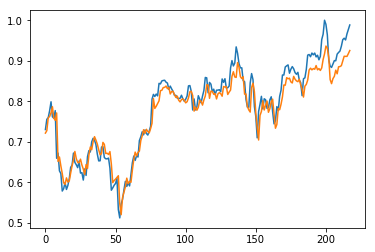

In [2]:
def MinMaxScaler(data):
    ''' Min Max Normalization
    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]
    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]
    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
    '''
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

timesteps = seq_length = 7
data_dim = 5
# 최종 출력은 1개가된다 (예측)
output_dim = 1

xy = np.loadtxt('data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]
xy = MinMaxScaler(xy)
x = xy
y = xy[:, [-1]] # close as Label

dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i: i+ seq_length]
    _y = y[i + seq_length]
    print(_x, " -> ", _y)
    dataX.append(_x)
    dataY.append(_y)

train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:])

X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])
#hidden dim은 어차피 fully connected NN을 지날것이므로 hidden_size는 자유롭게 정할수 있다.
hidden_dim = 5
cell = tf.contrib.rnn.BasicLSTMCell(num_units = hidden_dim, state_is_tuple=True)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype = tf.float32)
# output들중에 마지막에 하나만 쓰므로 outputs[:, -1]
Y_pred = tf.contrib.layers.fully_connected(outputs[:, -1], output_dim, activation_fn=None)

#loss sum of square
loss = tf.reduce_sum(tf.square(Y_pred - Y))

optimizer = tf.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(1000):
    _, l = sess.run([train, loss], feed_dict = {X: trainX, Y: trainY})
    print(i, l)
    
testPredict = sess.run(Y_pred, feed_dict = {X: testX})

plt.plot(testY)
plt.plot(testPredict)
plt.show()